In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.decomposition import PCA

In [35]:
pd.set_option('display.max_columns', None)

In [36]:
df = pd.read_csv("Speeddating_Processed.csv")
df = df.drop(["Unnamed: 0", "has_null", "wave", "interests_correlate", "guess_prob_liked", "decision", "decision_o", "met"], axis=1)
df = df.drop([col for col in df if col.startswith("d_")], axis=1)
df = df.drop([col for col in df if "_o" in col], axis=1)

for ind, row in df.iterrows():
    if row["gender"] == "female":
        df.loc[ind, "gender"] = 1
    elif row["gender"] == "male":
        df.loc[ind, "gender"] = 0

# Race Column One Hot Encoded or Dropped
# df = df.join(pd.get_dummies(df.pop("race"), dtype=int))
df = df.drop("race", axis=1)

# Field Column One Hot Encoded or Dropped
# df = df.join(pd.get_dummies(df.pop("field"), dtype=int))
df = df.drop("field", axis=1)

df

,gender,age,samerace,importance_same_race,importance_same_religion,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,expected_happy_with_sd_people,like,match
0,1,21.0,0,2.0,4.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,7.0,0
1,1,21.0,0,2.0,4.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,7.0,0
2,1,21.0,0,2.0,4.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,7.0,1
3,1,21.0,0,2.0,4.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,6.0,1
4,1,21.0,0,2.0,4.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,4.0,9.0,7.0,4.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074,0,25.0,1,1.0,1.0,70.0,0.0,15.0,15.0,0.0,0.0,8.0,7.0,6.0,7.0,7.0,7.0,5.0,5.0,5.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,4.0,0
7075,0,25.0,0,1.0,1.0,70.0,0.0,15.0,15.0,0.0,0.0,8.0,7.0,6.0,7.0,7.0,3.0,5.0,5.0,5.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,2.0,0
7076,0,25.0,0,1.0,1.0,70.0,0.0,15.0,15.0,0.0,0.0,8.0,7.0,6.0,7.0,7.0,4.0,6.0,8.0,4.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,4.0,0
7077,0,25.0,0,1.0,1.0,70.0,0.0,15.0,15.0,0.0,0.0,8.0,7.0,6.0,7.0,7.0,4.0,6.0,5.0,4.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,5.0,0


In [37]:
tempDF = df.drop("match", axis=1)

scaler = StandardScaler()
scaled_arr = scaler.fit_transform(tempDF)
scaled_df = pd.DataFrame(scaled_arr, index=tempDF.index, columns=tempDF.columns).join(df.loc[:,"match"])

scaled_df

,gender,age,samerace,importance_same_race,importance_same_religion,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,expected_happy_with_sd_people,like,match
0,0.999294,-1.510659,-0.817314,-0.629416,0.121457,-0.597422,0.362857,-0.057670,-0.411495,0.700629,0.493945,-0.787565,-0.226143,0.180223,-0.394045,-0.322908,-0.102716,1.052405,-0.252673,0.299478,0.986581,-0.923651,0.718481,0.677701,-3.016268,-2.593375,-0.278817,-1.110195,-0.302866,-0.861141,1.438557,-2.645778,1.235556,1.477397,0.651220,0.880210,-1.244794,-1.455416,0.465329,0
1,0.999294,-1.510659,-0.817314,-0.629416,0.121457,-0.597422,0.362857,-0.057670,-0.411495,0.700629,0.493945,-0.787565,-0.226143,0.180223,-0.394045,-0.322908,0.413380,0.470444,-0.252673,0.818641,0.986581,-0.923651,0.718481,0.677701,-3.016268,-2.593375,-0.278817,-1.110195,-0.302866,-0.861141,1.438557,-2.645778,1.235556,1.477397,0.651220,0.880210,-1.244794,-1.455416,0.465329,0
2,0.999294,-1.510659,-0.817314,-0.629416,0.121457,-0.597422,0.362857,-0.057670,-0.411495,0.700629,0.493945,-0.787565,-0.226143,0.180223,-0.394045,-0.322908,0.413380,-0.693478,0.405775,0.299478,0.986581,-0.923651,0.718481,0.677701,-3.016268,-2.593375,-0.278817,-1.110195,-0.302866,-0.861141,1.438557,-2.645778,1.235556,1.477397,0.651220,0.880210,-1.244794,-1.455416,0.465329,1
3,0.999294,-1.510659,-0.817314,-0.629416,0.121457,-0.597422,0.362857,-0.057670,-0.411495,0.700629,0.493945,-0.787565,-0.226143,0.180223,-0.394045,-0.322908,-0.618812,-0.693478,-0.252673,0.299478,0.986581,-0.923651,0.718481,0.677701,-3.016268,-2.593375,-0.278817,-1.110195,-0.302866,-0.861141,1.438557,-2.645778,1.235556,1.477397,0.651220,0.880210,-1.244794,-1.455416,-0.086090,1
4,0.999294,-1.510659,-0.817314,-0.629416,0.121457,-0.597422,0.362857,-0.057670,-0.411495,0.700629,0.493945,-0.787565,-0.226143,0.180223,-0.394045,-0.322908,-1.134908,1.052405,-0.252673,-1.258012,0.986581,-0.923651,0.718481,0.677701,-3.016268,-2.593375,-0.278817,-1.110195,-0.302866,-0.861141,1.438557,-2.645778,1.235556,1.477397,0.651220,0.880210,-1.244794,-1.455416,-0.086090,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074,-1.000707,-0.371125,1.223520,-0.982478,-0.943086,4.046668,-2.518729,-0.797401,-0.411495,-1.767049,-1.873438,0.652676,-0.934489,-1.098133,-1.316784,-0.322908,0.413380,-1.275439,-1.569571,-0.738849,0.602823,-0.923651,-0.528424,1.260834,1.469271,1.452130,0.494292,-1.110195,1.304625,0.143311,-0.918745,0.079168,0.627569,1.477397,1.222117,0.496882,-0.506253,2.591509,-1.188927,0
7075,-1.000707,-0.371125,-0.817314,-0.982478,-0.943086,4.046668,-2.518729,-0.797401,-0.411495,-1.767049,-1.873438,0.652676,-0.934489,-1.098133,-1.316784,-0.322908,-1.651004,-1.275439,-1.569571,-0.738849,0.602823,-0.923651,-0.528424,1.260834,1.469271,1.452130,0.494292,-1.110195,1.304625,0.143311,-0.918745,0.079168,0.627569,1.477397,1.222117,0.496882,-0.506253,2.591509,-2.291764,0
7076,-1.000707,-0.371125,-0.817314,-0.982478,-0.943086,4.046668,-2.518729,-0.797401,-0.411495,-1.767049,-1.873438,0.652676,-0.934489,-1.098133,-1.316784,-0.322908,-1.134908,-0.693478,0.405775,-1.258012,0.602823,-0.923651,-0.528424,1.260834,1.469271,1.452130,0.494292,-1.110195,1.304625,0.143311,-0.918745,0.079168,0.627569,1.477397,1.222117,0.496882,-0.506253,2.591509,-1.188927,0
7077,-1.000707,-0.371125,-0.817314,-0.982478,-0.943086,4.046668,-2.518729,-0.797401,-0.411495,-1.767049,-1.873438,0.652676,-0.934489,-1.098133,-1.316784,-0.322908,-1.134908,-0.693478,-1.569571,-1.258012,0.602823,-0.923651,-0.528424,1.260834,1.469271,1.452130,0.494292,-1.110195,1.304625,0.143311,-0.918745,0.079168,0.627569,1.477397,1

In [38]:
def plotPCA(df, target, binary=False, s=5):
    features = list(df.columns)
    features.remove(target)

    # n_components necessary to explain 80% of the variance
    pca = PCA()
    components = pca.fit_transform(df[features])

    PC1 = components[:,0]
    PC2 = components[:,1]

    zipped = list(zip(PC1,
                      PC2,
                      df[target]))

    pc_df = pd.DataFrame(zipped,
                         columns=['PC1',
                                  'PC2',
                                  target])

    fig, ax = plt.subplots(figsize=(12,7))

    if binary:
        sns.scatterplot(data=pc_df,
                        x="PC1",
                        y="PC2",
                        hue=target,
                        linewidth=0,
                        s=s)
    else:
        sns.scatterplot(data=pc_df,
                        x="PC1",
                        y="PC2",
                        hue=target,
                        linewidth=0,
                        s=5,
                        legend=False)


    plt.title(f"Speed Dating PCA\nExplained Variance: {pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]}",
              fontsize=16)
    plt.xlabel('First Principal Component',
               fontsize=16)
    plt.ylabel('Second Principal Component',
               fontsize=16)

    if not binary:
        norm = plt.Normalize(pc_df[target].min(), pc_df[target].max())
        cmap = sns.cubehelix_palette(n_colors=2, light=1, as_cmap=True)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])

        cax = fig.add_axes([ax.get_position().x1+0.05, ax.get_position().y0, 0.06, ax.get_position().height / 2])
        ax.figure.colorbar(sm, cax=cax)

    plt.show()

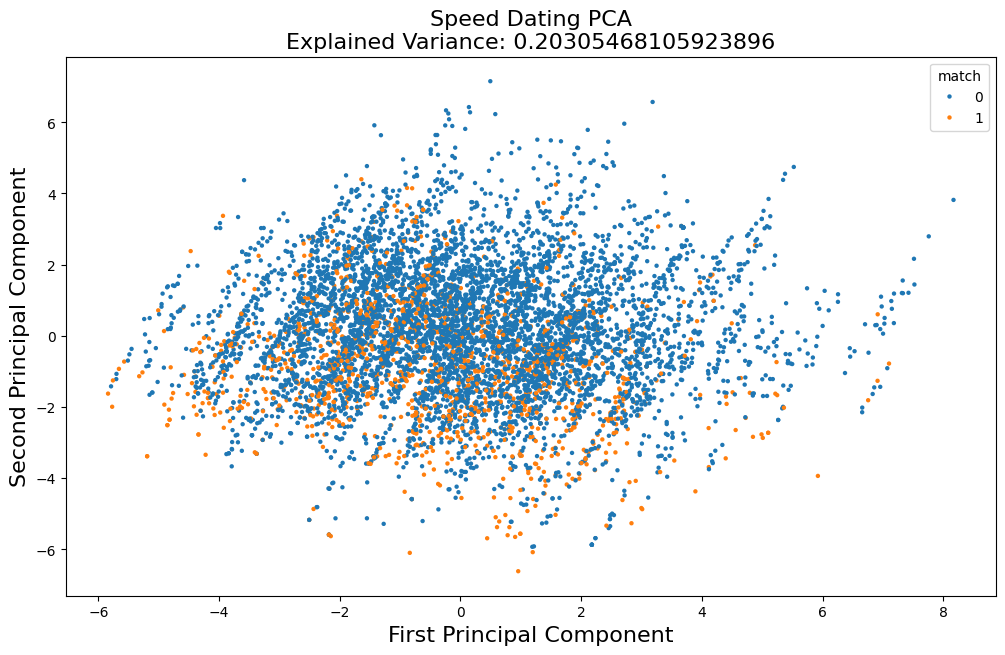

In [39]:
plotPCA(scaled_df, "match", binary=True, s=10)

In [40]:
def plotPairedPCA(df, target, n_components, n_shown, s=5):
    features = list(df.columns)
    features.remove(target)

    # n_components necessary to explain 80% of the variance
    pca = PCA(n_components=n_components)
    components = pca.fit_transform(df[features])

    print("Total Explained Variance: ", sum(pca.explained_variance_ratio_))


    PCs = []
    colNames = []
    for i in range(n_shown):
        PCs.append(components[:,i])
        colNames.append(f"PC{i+1}")

    zipped = list(zip(*PCs,
                      df[target]))

    pc_df = pd.DataFrame(zipped,
                         columns=[*colNames,
                                  target])

    g = sns.PairGrid(data=pc_df,
                    hue=target)
    g.map(sns.scatterplot, linewidth=0, s=s)

    expVar = 0
    for j in range(n_shown):
        expVar += pca.explained_variance_ratio_[j]

    plt.suptitle(f"Speed Dating PCA\nExplained Variance: {expVar}",
              fontsize=16)
    g.fig.subplots_adjust(top=0.9)
    g.add_legend()

    plt.show()

Total Explained Variance:  0.8831674695848715


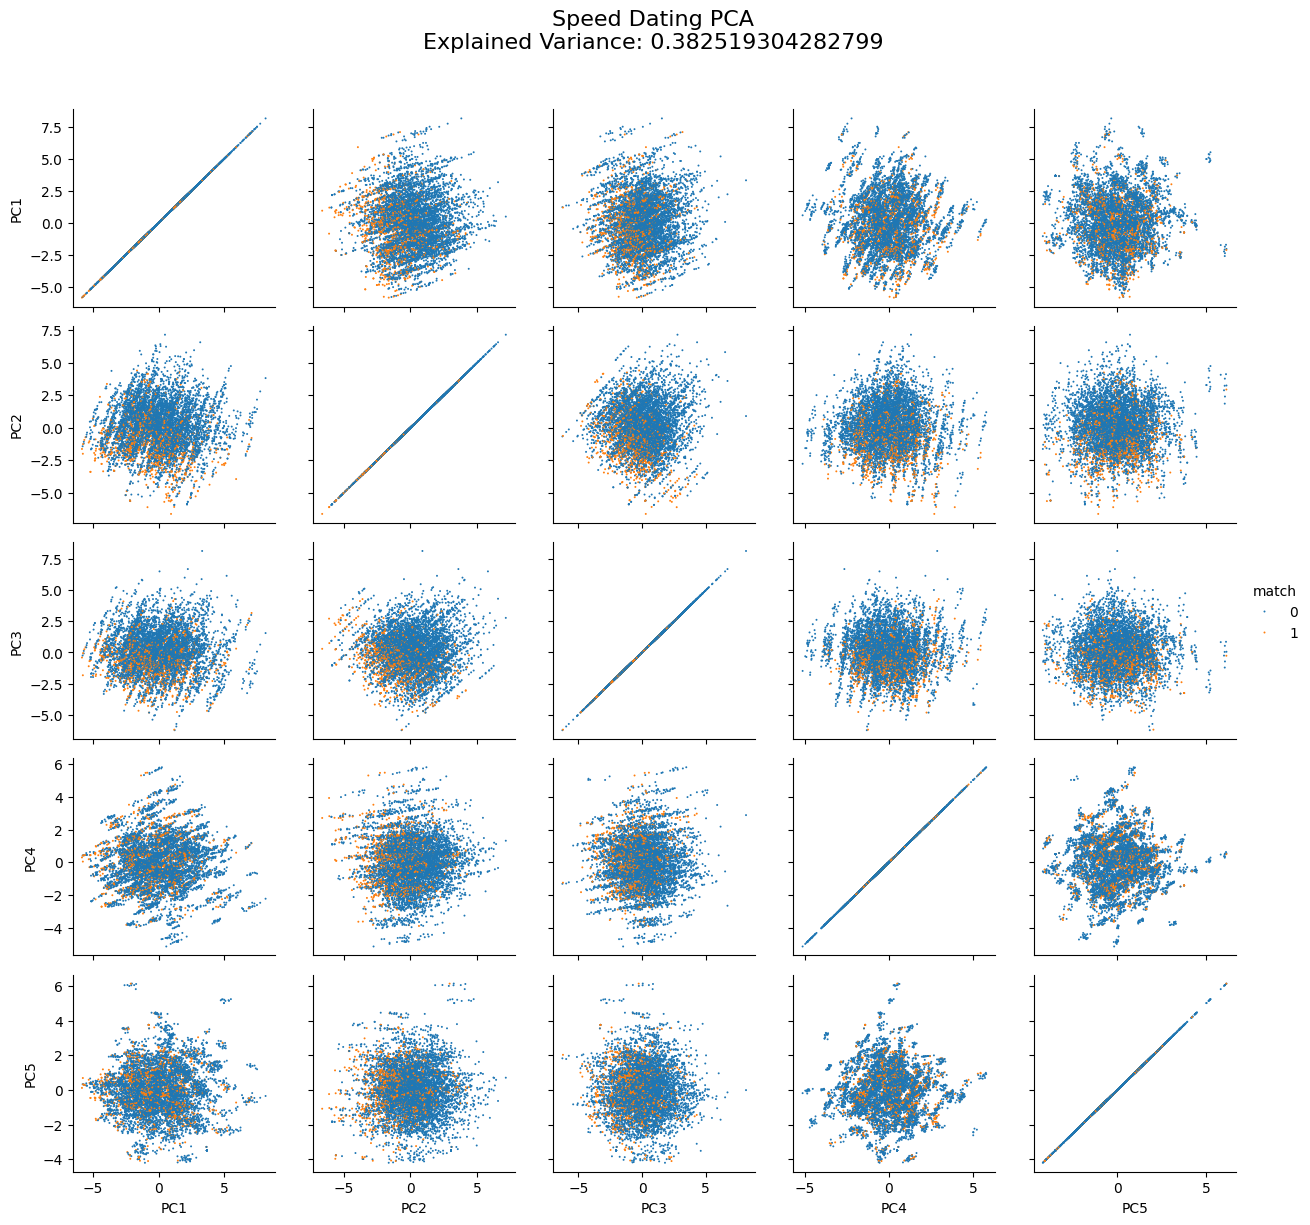

In [41]:
plotPairedPCA(scaled_df, "match", 25, 5, s=2)